# Frequentist Inference Case Study - Part A 

## 1. Learning objectives

Welcome to part A of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. Frequentist inference is the process of deriving conclusions about an underlying distribution via the observation of data. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

## Prerequisites

To be able to complete this notebook, you are expected to have a basic understanding of:
* what a random variable is (p.400 of Professor Spiegelhalter's *The Art of Statistics, hereinafter AoS*)
* what a population, and a population distribution, are (p. 397 of *AoS*)
* a high-level sense of what the normal distribution is (p. 394 of *AoS*)
* what the t-statistic is (p. 275 of *AoS*)

Happily, these should all be concepts with which you are reasonably familiar after having read ten chapters of Professor Spiegelhalter's book, *The Art of Statistics*.

We'll try to relate the concepts in this case study back to page numbers in *The Art of Statistics* so that you can focus on the Python aspects of this case study. The second part (part B) of this case study will involve another, more real-world application of these tools. 

For this notebook, we will use data sampled from a known normal distribution. This allows us to compare our results with theoretical expectations.

## 2. An introduction to sampling from the normal distribution

First, let's explore the ways we can generate the normal distribution. While there's a fair amount of interest in [sklearn](https://scikit-learn.org/stable/) within the machine learning community, you're likely to have heard of [scipy](https://docs.scipy.org/doc/scipy-0.15.1/reference/index.html) if you're coming from the sciences. For this assignment, you'll use [scipy.stats](https://docs.scipy.org/doc/scipy-0.15.1/reference/tutorial/stats.html) to complete your work. 

This assignment will require some digging around and getting your hands dirty (your learning is maximized that way)! You should have the research skills and the tenacity to do these tasks independently, but if you struggle, reach out to your immediate community and your mentor for help. 

In [2]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt

__Q1:__ Call up the documentation for the `norm` function imported above. (Hint: that documentation is [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)). What is the second listed method?

__A:__

<div style="font-size:16px; font-family:Courier New;">
    
Under the <u>Methods</u> section, the second listed method (after ``norm.rvs()``) is ``norm.pdf()`` which takes in an ``x`` value for the first argument, and the key-word arguments ``loc`` (mean, default of 0) and ``scale`` (stdev, default of 1).  The method returns the probability for x when plugged into the PDF of the Gaussian distribution with the specified mean and stdev.  

</div>

__Q2:__ Use the method that generates random variates to draw five samples from the standard normal distribution. 

__A:__

In [260]:
seed(47)
# draw five samples here
data = norm.rvs(size=5)

__Q3:__ What is the mean of this sample? Is it exactly equal to the value you expected? Hint: the sample was drawn from the standard normal distribution. If you want a reminder of the properties of this distribution, check out p. 85 of *AoS*. 

__A:__

In [62]:
# Calculate and print the mean here, hint: use np.mean()
mean = np.mean(data)
print(mean)

0.19355593334131074


<div style="font-size:16px; font-family:Courier New;">
    
No, this sample mean $\bar{x} \approx 0.19356$ is not exactly equal to the expected value of $\mu = 0$ for the standard normal distribution.

</div>

__Q4:__ What is the standard deviation of these numbers? Calculate this manually here as $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}$ (This is just the definition of **standard deviation** given by Professor Spiegelhalter on p.403 of *AoS*). Hint: np.sqrt() and np.sum() will be useful here and remember that numPy supports [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

__A:__

<div style="font-size:16px; font-family:Courier New;">

#### Standard Deviation w/o Bessel's Correction($\text{df} = n$)

In [263]:
# Generate array of deviations from the mean
deviations = data - mean

# Square each deviation in the array
square_devs = devs**2

# Sum the squared deviations
sum_sq_devs = np.sum(square_devs)

# Calculate population variance using df = n in the denominator
n = len(data)
pop_var = sum_sq_devs / n

# Take the square-root of the variance to get standard deviation
pop_stdev = np.sqrt(pop_var)

# Print the result
print(f"\n{pop_stdev:.4f}\n")


0.9606



Here we have calculated the actual standard deviation of a small data set (of size 5). But in this case, this small data set is actually a sample from our larger (infinite) population. In this case, the population is infinite because we could keep drawing our normal random variates until our computers die! 

In general, the sample mean we calculate will not be equal to the population mean (as we saw above). A consequence of this is that the sum of squares of the deviations from the _population_ mean will be bigger than the sum of squares of the deviations from the _sample_ mean. In other words, the sum of squares of the deviations from the _sample_ mean is too small to give an unbiased estimate of the _population_ variance. An example of this effect is given [here](https://en.wikipedia.org/wiki/Bessel%27s_correction#Source_of_bias). Scaling our estimate of the variance by the factor $n/(n-1)$ gives an unbiased estimator of the population variance. This factor is known as [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction). The consequence of this is that the $n$ in the denominator is replaced by $n-1$.

You can see Bessel's correction reflected in Professor Spiegelhalter's definition of **variance** on p. 405 of *AoS*.

<hr>

__Q5:__ If all we had to go on was our five samples, what would be our best estimate of the population standard deviation? Use Bessel's correction ($n-1$ in the denominator), thus $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}}$.

<hr style="height:1px;border-width:0">

__A:__

<div style="font-size:16px; font-family:Courier New;">

#### Standard Deviation using Bessel's Correction($\text{df} = n - 1$)

In [259]:
# "Undo" the usage of df=n for calculating variance (i.e. multipy by n), and apply df=n-1 instead (divide by n-1):
sample_var = pop_var * n / (n-1)

# Take the square-root as before to get stdev:
sample_stdev = np.sqrt(sample_var)

# Print result
print(f"\n{sample_stdev:.4f}\n")


1.0740



<hr>

__Q6:__ Now use numpy's std function to calculate the standard deviation of our random samples. Which of the above standard deviations did it return?

<hr style="height:1px;border-width:0">

__A:__

In [264]:
np_stdev = np.std(data)

print(f"\n{np_stdev:.4f}\n")


0.9606



<div style="font-size:16px; font-family:Courier New;">
This is the standard deviation calculated without using Bessel's correction (i.e., df=n), which would have been more appropriate for the population standard deviation.

<hr>

__Q7:__ Consult the documentation for np.std() to see how to apply the correction for estimating the population parameter and verify this produces the expected result.
<hr style="height:1px;border-width:0">

__A:__

<div style="font-size:16px; font-family:Courier New;">
    
For `numpy>=2.0.0`, you can use the kwarg `correction=1`; otherwise, use `ddof=1` to apply Bessel's correction.

In [9]:
np.__version__

'1.26.4'

In [266]:
# Calculate & print stdev using numpy and df = n - 1
np_stdev_bessel = np.std(data,ddof=1)
print(f"\n{np_stdev_bessel:.4f}\n")


1.0740



In [267]:
# Verify this is the expected result
np_stdev_bessel == sample_stdev

True

<hr>

### Summary of section

In this section, you've been introduced to the scipy.stats package and used it to draw a small sample from the standard normal distribution. You've calculated the average (the mean) of this sample and seen that this is not exactly equal to the expected population parameter (which we know because we're generating the random variates from a specific, known distribution). You've been introduced to two ways of calculating the standard deviation; one uses $n$ in the denominator and the other uses $n-1$ (Bessel's correction). You've also seen which of these calculations np.std() performs by default and how to get it to generate the other.

You use $n$ as the denominator if you want to calculate the standard deviation of a sequence of numbers. You use $n-1$ if you are using this sequence of numbers to estimate the population parameter. This brings us to some terminology that can be a little confusing.

The population parameter is traditionally written as $\sigma$ and the sample statistic as $s$. Rather unhelpfully, $s$ is also called the sample standard deviation (using $n-1$) whereas the standard deviation of the sample uses $n$. That's right, we have the sample standard deviation and the standard deviation of the sample and they're not the same thing!

The sample standard deviation
\begin{equation}
s = \sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}} \approx \sigma,
\end{equation}
is our best (unbiased) estimate of the population parameter ($\sigma$).

If your dataset _is_ your entire population, you simply want to calculate the population parameter, $\sigma$, via
\begin{equation}
\sigma = \sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}
\end{equation}
as you have complete, full knowledge of your population. In other words, your sample _is_ your population. It's worth noting that we're dealing with what Professor Spiegehalter describes on p. 92 of *AoS* as a **metaphorical population**: we have all the data, and we act as if the data-point is taken from a population at random. We can think of this population as an imaginary space of possibilities. 

If, however, you have sampled _from_ your population, you only have partial knowledge of the state of your population. In this case, the standard deviation of your sample is not an unbiased estimate of the standard deviation of the population, in which case you seek to estimate that population parameter via the sample standard deviation, which uses the $n-1$ denominator.

Great work so far! Now let's dive deeper.
<hr>

## 3. Sampling distributions

So far we've been dealing with the concept of taking a sample from a population to infer the population parameters. One statistic we calculated for a sample was the mean. As our samples will be expected to vary from one draw to another, so will our sample statistics. If we were to perform repeat draws of size $n$ and calculate the mean of each, we would expect to obtain a distribution of values. This is the sampling distribution of the mean. **The Central Limit Theorem (CLT)** tells us that such a distribution will approach a normal distribution as $n$ increases (the intuitions behind the CLT are covered in full on p. 236 of *AoS*). For the sampling distribution of the mean, the standard deviation of this distribution is given by

\begin{equation}
\sigma_{mean} = \frac{\sigma}{\sqrt n}
\end{equation}

where $\sigma_{mean}$ is the standard deviation of the sampling distribution of the mean and $\sigma$ is the standard deviation of the population (the population parameter).

This is important because typically we are dealing with samples from populations and all we know about the population is what we see in the sample. From this sample, we want to make inferences about the population. We may do this, for example, by looking at the histogram of the values and by calculating the mean and standard deviation (as estimates of the population parameters), and so we are intrinsically interested in how these quantities vary across samples. 

In other words, now that we've taken one sample of size $n$ and made some claims about the general population, what if we were to take another sample of size $n$? Would we get the same result? Would we make the same claims about the general population? This brings us to a fundamental question: _when we make some inference about a population based on our sample, how confident can we be that we've got it 'right'?_

We need to think about **estimates and confidence intervals**: those concepts covered in Chapter 7, p. 189, of *AoS*.

Now, the standard normal distribution (with its variance equal to its standard deviation of one) would not be a great illustration of a key point. Instead, let's imagine we live in a town of 50,000 people and we know the height of everyone in this town. We will have 50,000 numbers that tell us everything about our population. We'll simulate these numbers now and put ourselves in one particular town, called 'town 47', where the population mean height is 172 cm and population standard deviation is 5 cm.

In [11]:
seed(47)
pop_heights = norm.rvs(172, 5, size=50000)

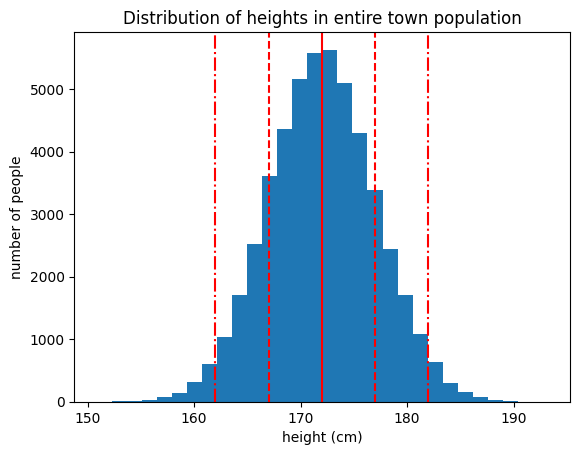

In [12]:
_ = plt.hist(pop_heights, bins=30)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in entire town population')
_ = plt.axvline(172, color='r')
_ = plt.axvline(172+5, color='r', linestyle='--')
_ = plt.axvline(172-5, color='r', linestyle='--')
_ = plt.axvline(172+10, color='r', linestyle='-.')
_ = plt.axvline(172-10, color='r', linestyle='-.')

Now, 50,000 people is rather a lot to chase after with a tape measure. If all you want to know is the average height of the townsfolk, then can you just go out and measure a sample to get a pretty good estimate of the average height?

In [13]:
def townsfolk_sampler(n):
    return np.random.choice(pop_heights, n)

Let's say you go out one day and randomly sample 10 people to measure.

In [14]:
seed(47)
daily_sample1 = townsfolk_sampler(10)

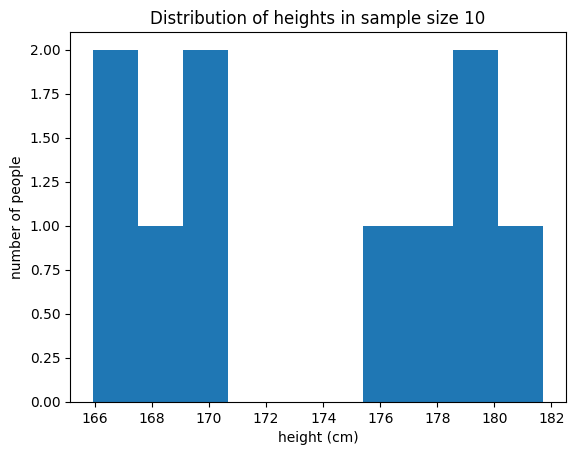

In [15]:
_ = plt.hist(daily_sample1, bins=10)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in sample size 10')

The sample distribution doesn't resemble what we take the population distribution to be. What do we get for the mean?

In [16]:
np.mean(daily_sample1)

173.47911444163503

And if we went out and repeated this experiment?

In [17]:
daily_sample2 = townsfolk_sampler(10)

In [18]:
np.mean(daily_sample2)

173.7317666636263

<hr>
__Q8:__ Simulate performing this random trial every day for a year, calculating the mean of each daily sample of 10, and plot the resultant sampling distribution of the mean.
<hr style="height:1px;border-width:0">


__A:__


In [272]:
seed(47)
# take your samples here

#initialize list of daily samples and empty array of daily sample means for 365 days total / 1 year
daily_samples=[]
daily_means=np.empty(365)

for i in range(365):
    # Draw daily sample of size n=10
    qdsample = townsfolk_sampler(10)
    
    # Append daily sample to list of all daily samples
    daily_samples.append(qdsample)

    # Calculate daily mean and update array of daily sample means
    daily_means[i] = np.mean(qdsample)

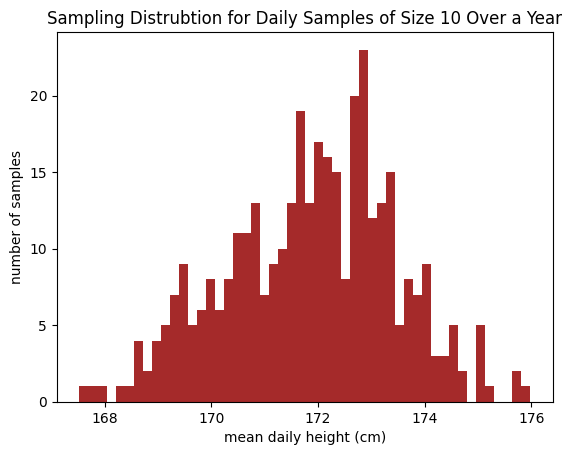

In [274]:
# Plot the Sampling Distribution of the Mean:
_ = plt.hist(daily_means,bins=50,color='brown')
_ = plt.xlabel('mean daily height (cm)')
_ = plt.ylabel('number of samples')
_ = plt.title('Sampling Distrubtion for Daily Samples of Size 10 Over a Year')

The above is the distribution of the means of samples of size 10 taken from our population. The Central Limit Theorem tells us the expected mean of this distribution will be equal to the population mean, and standard deviation will be $\sigma / \sqrt n$, which, in this case, should be approximately 1.58.

<hr>

__Q9:__ Verify the above results from the CLT.
<hr style="height:1px;border-width:0">

__A:__

<div style="font-size:16px; font-family:Courier New;">

#### Verifying $\mathbf{E}[\bar{X}] \approx \mu$

In [275]:
bs_mean = daily_means.mean()
print(f"Bootstrap Mean (Expected Mean): \033[1m\033[41m{bs_mean.round(2)}\033[0m")

Bootstrap Mean (Expected Mean): 171.87


<div style="font-size:16px; font-family:Courier New;">

This expected mean of **171.87** is approximately equal to the population mean, which was set at **172** when defining `pop_heights` earlier in this section.

<div style="font-size:16px; font-family:Courier New;">

#### Verifying $s_{\bar{X}} \approx \frac{\sigma}{\sqrt{n}} \approx 1.58$

In [293]:
# Calculate standard deviation of the bootstrap sample means (bs_std)
bs_std = daily_means.std(ddof=1)

# Using the population standard deviation that was set at 5, calculate standard error of the mean:
standard_error =  5 / np.sqrt(10)

print(f"Bootstrap Stdev: \033[1m{bs_std.round(2)}\033[0m")
print(f"Standard Error: \033[1m\033[41m{standard_error.round(2)}\033[0m")

Bootstrap Stdev: 1.58
Standard Error: 1.58


<div style="font-size:16px; font-family:Courier New;">

Rounding up each to 2 decimal places, it is clear that $s_{\bar{X}} \approx \frac{\sigma}{\sqrt{n}} \approx 1.58$

<hr>

Remember, in this instance, we knew our population parameters, that the average height really is 172 cm and the standard deviation is 5 cm, and we see some of our daily estimates of the population mean were as low as around 168 and some as high as 176.

__Q10:__ Repeat the above year's worth of samples but for a sample size of 50 (perhaps you had a bigger budget for conducting surveys that year)! Would you expect your distribution of sample means to be wider (more variable) or narrower (more consistent)? Compare your resultant summary statistics to those predicted by the CLT.
<hr style="height:1px;border-width:0">

__A:__

In [288]:
seed(47)
# calculate daily means from the larger sample size here
daily_samples_n50=[]
daily_means_n50=np.empty(365)
for i in range(365):
    qdsample = townsfolk_sampler(50)
    daily_samples_n50.append(qdsample)
    daily_means_n50[i] = np.mean(qdsample)

<div style="font-size:16px; font-family:Courier New;">

I would expect the sampling distribution of means to be more narrow / consistent due to the larger sample size of n = 50 compared to n = 10.  As seen in the plot below, this is true &mdash; the values fall roughly between 170 and 174 &mdash; when compared to the plot with n = 10 &mdash for which values fell roughly between 167 and 176.

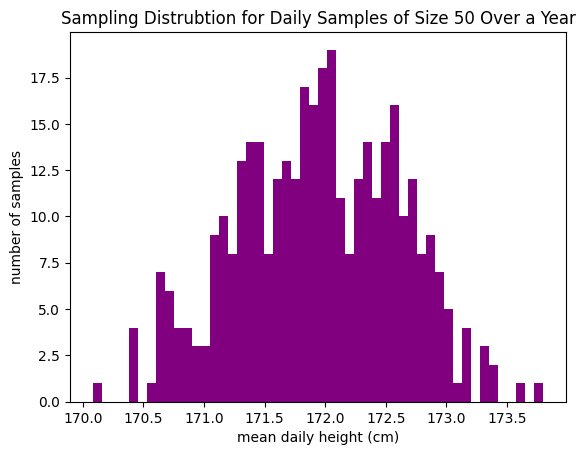

In [289]:
_ = plt.hist(daily_means_n50,bins=50,color='purple')
_ = plt.xlabel('mean daily height (cm)')
_ = plt.ylabel('number of samples')
_ = plt.title('Sampling Distrubtion for Daily Samples of Size 50 Over a Year')

In [328]:
# Calculate boostrap mean for n = 50
bs_mean_n50 = daily_means_n50.mean()

# Calculate boostrap standard deviation for n = 50 
bs_std_n50 = daily_means_n50.std(ddof=1)

# Calculate standard error for n = 50
standard_error_n50 = 5 / np.sqrt(50)

# Compare with n = 10
import pandas as pd
indices = [ "n=10","n=50"]
n10 = [ bs_mean, bs_std, standard_error ] 
n50 = [ bs_mean_n50, bs_std_n50, standard_error_n50 ]
cols = [ 'mean', "stdev",'S.E.' ]
comparison = pd.DataFrame([n10,n50],columns=cols,index=indices)
comparison.T.round(2)

,n=10,n=50
mean,171.87,171.94
stdev,1.58,0.67
S.E.,1.58,0.71


<div style="font-size:16px; font-family:Courier New;">

With the increased size (n = 50):
* the bootstrap mean is about the same as with n = 10, and is slightly closer to the population mean of 172
* the bootstrap standard deviation (stdev) / standard error of the mean (S.E.) is smaller, indicating less variation in the sample means
* bootstrapping 50,000 samples seemed to generate a standard deviation slightly less than the theoretical calculation (0.67 vs. 0.71); perhaps a different run with a different seed might generate something closer to 0.71, although it still is approximately the same.

<hr>

What we've seen so far, then, is that we can estimate population parameters from a sample from the population, and that samples have their own distributions. Furthermore, the larger the sample size, the narrower are those sampling distributions.

### Normally testing time!

All of the above is well and good. We've been sampling from a population we know is normally distributed, we've come to understand when to use $n$ and when to use $n-1$ in the denominator to calculate the spread of a distribution, and we've  seen the Central Limit Theorem in action for a sampling distribution. All seems very well behaved in Frequentist land. But, well, why should we really care?

Remember, we rarely (if ever) actually know our population parameters but we still have to estimate them somehow. If we want to make inferences to conclusions like "this observation is unusual" or "my population mean has changed" then we need to have some idea of what the underlying distribution is so we can calculate relevant probabilities. In frequentist inference, we use the formulae above to deduce these population parameters. Take a moment in the next part of this assignment to refresh your understanding of how these probabilities work.

Recall some basic properties of the standard normal distribution, such as that about 68% of observations are within plus or minus 1 standard deviation of the mean. Check out the precise definition of a normal distribution on p. 394 of *AoS*. 

__Q11:__ Using this fact, calculate the probability of observing the value 1 or less in a single observation from the standard normal distribution. Hint: you may find it helpful to sketch the standard normal distribution (the familiar bell shape) and mark the number of standard deviations from the mean on the x-axis and shade the regions of the curve that contain certain percentages of the population.
<hr style="height:1px;border-width:0">

__A:__

<div style="font-size:16px; font-family:Courier New;">

<u>Calculation using Standard Normal Distribution Features</u><br>
<i>Since the <u>standard</u> normal distribution is such that $ \mu = 0 $ and $\sigma = 1 $, the fact that ~68% of the area lies between $-1\sigma$ and $+1\sigma$ is equivalent to saying that the probability between -1 and +1 is ~0.68

Consequently, half of that probability is between 0 and 1 (0.68 / 2 = 0.34).  Meanwhile everything below zero has the probability 0.5, since the normal distribution is symmetric.  Thus, the probability of everything below and including 1 in the standard normal distribution is:</i>

$$ P(x\le0) + P(0 \le x \le 1) $$

$$\approx (0.5) + \Big(\frac{0.68}{2}\Big) $$

which evaluates to:


In [77]:
(50 + 68/2)/100

0.84


<hr>

Calculating this probability involved calculating the area under the curve from the value of 1 and below. To put it in mathematical terms, we need to *integrate* the probability density function. We could just add together the known areas of chunks (from -Inf to 0 and then 0 to $+\sigma$ in the example above). One way to do this is to look up tables (literally). Fortunately, scipy has this functionality built in with the cdf() function.

__Q12:__ Use the cdf() function to answer the question above again and verify you get the same answer.
<hr style="height:1px;border-width:0">

__A:__

<div style="font-size:16px; font-family:Courier New;">

<u>Calculation using ``scipy.stats.norm.cdf()``</u><br>

In [329]:
p_1nbelow = norm.cdf(1)

p_1nbelow.round(2)

0.84

<hr>

__Q13:__ Using our knowledge of the population parameters for our townsfolks' heights, what is the probability of selecting one person at random and their height being 177 cm or less? Calculate this using both of the approaches given above.
<hr style="height:1px;border-width:0">

__A:__

<div style="font-size:16px; font-family:Courier New;">
    
<u>Calculation using Standard Normal Distribution Features</u><br>
$\mu = 172 $ cm <br>
$\sigma = 5 $ cm

$P(\text{height}\le177) = ?$

Since 177 cm is exactly 5 cm above the mean of 172 cm, it is equivalent to $1\sigma$

As we are calculating the probability for 177 or less (and hence $1\sigma$ and below), will yield the same result as before -- the answer is **0.84**

<div style="font-size:16px; font-family:Courier New;">

<u>Calculation using ``scipy.stats.norm.cdf()``</u><br>

In [330]:
norm.cdf(177,loc=172,scale=5).round(2)

0.84

<hr>

__Q14:__ Turning this question around — suppose we randomly pick one person and measure their height and find they are 2.00 m tall. How surprised should we be at this result, given what we know about the population distribution? In other words, how likely would it be to obtain a value at least as extreme as this? Express this as a probability. 

<hr style="height:1px;border-width:0">

__A:__

<div style="font-size:16px; font-family:Courier New;">

Convert to $\text{cm}$:<br>

$ 2.00 \text{m} = (2.00 \text{m}) \frac{100 \text{cm}}{\text{m}} = 200 \text{cm} $

While ``norm.cdf(x)`` calculates probablity for values *below* ``x``, we can get probability for values *above* ``x`` by subtracting from 1:

In [220]:
p2mabove = 1 - norm.cdf(200,loc=172,scale=5)

print(f"{p2mabove:.4e}")

1.0718e-08


<div style="font-size:16px; font-family:Courier New;">

In other words, a height of 2.00 m or higher would be quite surprising / rare based on what is known about the population, with a probability of $1.0718 \times 10^{-8}$ (~ 1 in every 100 million townsfolk).
<hr>

What we've just done is calculate the ***p-value*** of the observation of someone 2.00m tall (review *p*-values if you need to on p. 399 of *AoS*). We could calculate this probability by virtue of knowing the population parameters. We were then able to use the known properties of the relevant normal distribution to calculate the probability of observing a value at least as extreme as our test value.

We're about to come to a pinch, though. We've said a couple of times that we rarely, if ever, know the true population parameters; we have to estimate them from our sample and we cannot even begin to estimate the standard deviation from a single observation. 

This is very true and usually we have sample sizes larger than one. This means we can calculate the mean of the sample as our best estimate of the population mean and the standard deviation as our best estimate of the population standard deviation. 

In other words, we are now coming to deal with the sampling distributions we mentioned above as we are generally concerned with the properties of the sample means we obtain. 

Above, we highlighted one result from the CLT, whereby the sampling distribution (of the mean) becomes narrower and narrower with the square root of the sample size. We remind ourselves that another result from the CLT is that _even if the underlying population distribution is not normal, the sampling distribution will tend to become normal with sufficiently large sample size_. (**Check out p. 199 of AoS if you need to revise this**). This is the key driver for us 'requiring' a certain sample size, for example you may frequently see a minimum sample size of 30 stated in many places. In reality this is simply a rule of thumb; if the underlying distribution is approximately normal then your sampling distribution will already be pretty normal, but if the underlying distribution is heavily skewed then you'd want to increase your sample size.

<hr>

__Q15:__ Let's now start from the position of knowing nothing about the heights of people in our town.
* Use the random seed of 47, to randomly sample the heights of 50 townsfolk
* Estimate the population mean using np.mean
* Estimate the population standard deviation using np.std (remember which denominator to use!)
* Calculate the (95%) [margin of error](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/margin-of-error/#WhatMofE) (use the exact critial z value to 2 decimal places - [look this up](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/find-critical-values/) or use norm.ppf()) Recall that the ***margin of error*** is mentioned on p. 189 of the *AoS* and discussed in depth in that chapter). 
* Calculate the 95% Confidence Interval of the mean (***confidence intervals*** are defined on p. 385 of *AoS*) 
* Does this interval include the true population mean?

<hr style="height:1px;border-width:0">

__A:__

In [29]:
seed(47)
# take your sample now
h50 = townsfolk_sampler(50)

<div style="font-size:16px; font-family:Courier New;">

<br>**1. Sample Mean**

In [110]:
#Sample mean (x-bar) / estimated mu:
h50avg = np.mean(h50); print(h50avg.round(2))

172.78


<div style="font-size:16px; font-family:Courier New;">
    
<br>**2. Sample Standard Deviation**

In [111]:
# Sample standard deviation (s) / estimated sigma:
h50std = np.std(h50,ddof=1); print(h50std.round(4))

4.1954


<div style="font-size:16px; font-family:Courier New;">
    
<br>**3. Critical Value ($z^*$):**

We can calculate the critical value for any distrubtion if we have the point-percent function (PPF) of the distribution, which is the inverse of the CDF.  In python, we can use ``scipy.stats.norm.ppf()`` for the PPF of the z-distribution ($\text{PPF}_z$).  Specifically, the critical value for a z-distribution for a given confidence level $\gamma$ (i.e., the percent of the CI we are trying to calculate expressed as a decimal) is denoted $z^*_\gamma$ and can be calculated by:

$$z^*_{\gamma} = - \text{PPF}_z\left(\frac{1-\gamma}{2}\right) = \text{PPF}_z\left(\gamma+\frac{1-\gamma}{2}\right) = \left|\text{PPF}_z\left(\frac{1-\gamma}{2}\right)\right|$$

Note that that $\gamma$ has a simple relationship with the signficance level $\alpha$:

$$\gamma = 1 - \alpha$$

So we could also say:

$$z^* = - \text{PPF}_z\left(\frac{\alpha}{2}\right) $$

For a 95% CI, and thus $\gamma = 0.95$ and $\alpha=0.05$:

$$z^*_{\gamma=0.95} = z^*_{\alpha=0.05} = -\text{PPF}_z\left(\frac{0.05}{2}\right)$$

which evaluates to:

In [225]:
# Calculate critical value (z*):
zs_95ci = -norm.ppf(0.05/2)
print(f"\nz*(95% CI):\t{zs_95ci.round(2)}\n")


z*(95% CI):	1.96



<div style="font-size:16px; font-family:Courier New;">

<br>**4. Margin of Error (MoE)**
$$ \text{MoE}_{0.95} = z^*_{0.95}\left( \frac{\sigma}{\sqrt{n}} \right) $$

Using $z^*_\gamma$ assumes knowledge of the population standard deviation, $\sigma$. However, for the sake of this exercise, we are pretending not to know this...  so using the sample standard deviation in place of this:

$$ \text{MoE}_{0.95} \approx z^*_{0.95}\left( \frac{s}{\sqrt{n}} \right) $$

In [243]:
# Margin of error:
moe95z = zs_95ci * h50std / np.sqrt(len(h50))
print(f"MoE(95% CI):\t{moe95z.round(4)}\n")

MoE(95% CI):	1.1629



<div style="font-size:16px; font-family:Courier New;">
    
<br>**5. Confidence Interval**
$$ \text{95\% CI} = \bar{x} \pm \text{MoE}_{0.95} $$

In [246]:
# 95% CI using z*:
ci95z = [h50avg - moe95z, h50avg + moe95z]
print(list(np.array(ci95z).round(4)))

[171.6186, 173.9444]


<div style="font-size:16px; font-family:Courier New;">
    
<br>**6. Verification**<br>
Yes, the true population mean of 172cm is included within this interval.

In [241]:
pop_mean = 172
ci95z[0] < pop_mean < ci95z[1]

True

<hr>

__Q16:__ Above, we calculated the confidence interval using the critical z value. What is the problem with this? What requirement, or requirements, are we (strictly) failing?

<hr style="height:1px;border-width:0">

__A:__

<div style="font-size:16px; font-family:Courier New;">

Some general requirements for using $z^*$ are that:

1. The data are roughly normally distributed, or at least the sampling distribution is.
2. $ n \ge 30 $
3. The population standard deviation ($\sigma$) is known.
4. Data are randomly sampled.
5. Data points are independent of each other.

Since we are pretending to "know nothing about the heights of people in our town", we technically don't know if it is normally distributed (condition #1).

Despite knowing the true population standard deviation, we are assuming we do not for this part of the exercise.  Thus, within the frame of this exercise, we are violating condition #3 by using the **z-distribution**.  In this case, it is more appropriate to use the **t-distribution**. 

Otherwise, the data were randomly sampled (#4), have no clear reason to be dependent on each other (#5), and are of size n=50 > 30 (#2).


<hr>

__Q17:__ Calculate the 95% confidence interval for the mean using the _t_ distribution. Is this wider or narrower than that based on the normal distribution above? If you're unsure, you may find this [resource](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/confidence-interval/) useful. For calculating the critical value, remember how you could calculate this for the normal distribution using norm.ppf().

<hr style="height:1px;border-width:0">

__A:__

<div style="font-size:16px; font-family:Courier New;">

The approach will be similar, but using $t^*$ instead of $z^*$ for the critical value.

**1. Critical Value ($t^*$)**<br>
In addition to $\gamma$ or $\alpha$, calculation of the critical value for a t-distribution requires an additional input &mdash; the degees of freedom (df):

$$ t^* = - \text{PPF}_t\left(\frac{\alpha}{2},\text{d.f.}\right) $$

where $\text{d.f.} = n -1$

NOTE: $n$ is the size of the **sample**, NOT the number of samples nor the population size (which is assumed to be unknown).

Using ``scipy.stats.t.ppf()``, this evaluates to:

In [335]:
# Critical value t* for 95% CI:
ts_95ci = - t.ppf( 0.05/2 , df = len(h50) - 1 )
print(ts_95ci.round(2))

2.01


<div style="font-size:16px; font-family:Courier New;">
    
This is slightly greater than the $z^*$ of ~1.96 calculated earlier.

<div style="font-size:16px; font-family:Courier New;">
    
<br>**2. Margin of Error (MoE)**

Essentially, the only difference now is that we would be "correct" in using using $s$, since using a t-distribution implies you do not know $\sigma$ in the first place:

$$ \text{MoE}_{\gamma=0.95} = t^*_{\gamma=0.95}\left( \frac{s}{\sqrt{n}} \right) $$

In [334]:
# Margin of error for 95% CI using t*:
moe95t = ts_95ci * (h50std / np.sqrt(len(h50)))
print(f"MoE(95% CI):\t{moe95t.round(4)}\n")

MoE(95% CI):	1.1923



<div style="font-size:16px; font-family:Courier New;">
    
Given $t^* > z^*$ to a slight degree, this is unsuprisingly also slightly larger than ``moe95z`` = 1.1629 from earlier. 

**3. Confidence Interval**

In [247]:
# 95% CI using t*:
ci95t = [h50avg - moe95t, h50avg + moe95t]
print(list(np.array(ci95t).round(4)))

[171.5892, 173.9738]


This is slightly wider than the previous confidence interval. This reflects the greater uncertainty given that we are estimating population parameters from a sample.

<hr>

## 4. Learning outcomes

Having completed this project notebook, you now have hands-on experience:
* sampling and calculating probabilities from a normal distribution
* identifying the correct way to estimate the standard deviation of a population (the population parameter) from a sample
* with sampling distribution and now know how the Central Limit Theorem applies
* with how to calculate critical values and confidence intervals